# How to visualize images in RxRx1

The RxRx1 cellular image dataset is made up of 6-channel images, where each channel illuminates a different part of the cell (visit [RxRx.ai](https://www.rxrx.ai/#the-data) for details).  This notebook demonstrates how to use the code in [rxrx1-utils](https://github.com/recursionpharma/rxrx1-utils) to load and visualize the images images stored in our Google Cloud Storage buckets.

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
if 'google.colab' in sys.modules:
    !git clone https://github.com/recursionpharma/rxrx1-utils
    sys.path.append('/content/rxrx1-utils')

from rxrx import io

Cloning into 'rxrx1-utils'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 44 (delta 15), reused 39 (delta 10), pack-reused 0
Unpacking objects: 100% (44/44), done.


## Loading a site

Use `rxrx.io.load_site` to get the 512 x 512 x 6 image tensor for a site.  The arguments you pass to `load_site` tell it which image you want.  In the example below, from the `train` set, we request the image in experiment `RPE-05` on plate `3` in well `D19` at site `2`.

In [3]:
t = io.load_site('train', 'RPE-05', 3, 'D19', 2)

t.shape

(512, 512, 6)

There is an optional `base_path` argument that defaults to `gs://rxrx1-us-central1/images`, one of the two buckets containing the RxRx1 image set.  The other image bucket is `gs://rxrx1-europe-west4/images`.   You can also set `base_path` to point to a local copy of the dataset.

In [4]:
u = io.load_site('train', 'RPE-05', 3, 'D19', 2, base_path='gs://rxrx1-europe-west4/images')

u.shape

(512, 512, 6)

Let's check and see that we got the same image from the two different buckets.

In [5]:
np.array_equal(t, u)

True

## Converting a site to RGB format

In order to visualize all 6 of these channels at once, use the `rxrx.io.convert_tensor_to_rgb` function that associates an RGB color with each channel, then aggregates the color channels across the six cellular channels.

In [6]:
x = io.convert_tensor_to_rgb(t)

x.shape

(512, 512, 3)

Now plot your RGB image however you like!

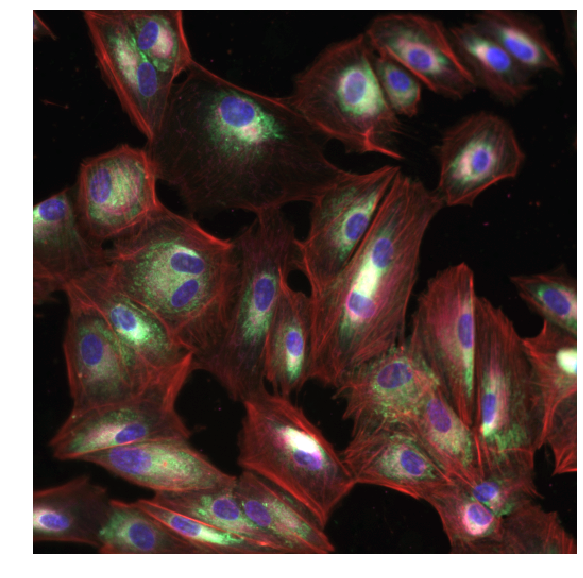

In [7]:
plt.figure(figsize=(10, 10))
plt.axis('off')

_ = plt.imshow(x)

## Load and convert to RGB

For convenience, there is a wrapper around these two functions called `rxrx.io.load_site_as_rgb` with the same signature as `load_site`.

In [8]:
y = io.load_site_as_rgb('train', 'RPE-05', 3, 'D19', 2)

np.array_equal(x, y)

True